In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

In [465]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [466]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [467]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [468]:
print(train['Survived'].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


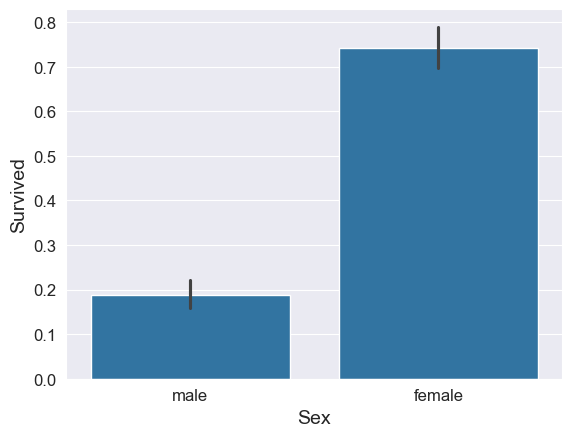

In [469]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

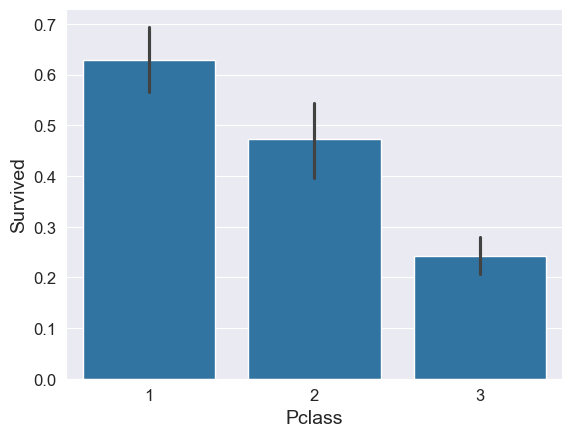

In [470]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

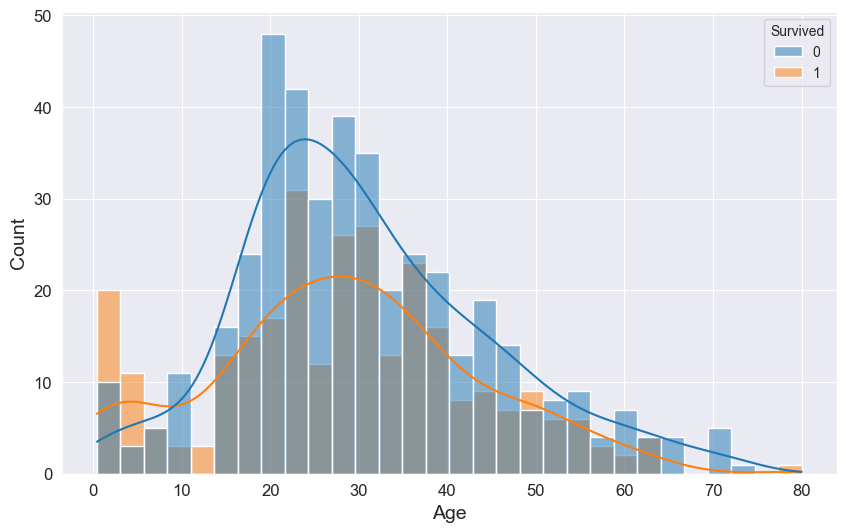

In [471]:
plt.figure(figsize = (10,6))
sns.histplot(data = train, x = 'Age', hue = 'Survived', kde = True, bins = 30)
plt.show()

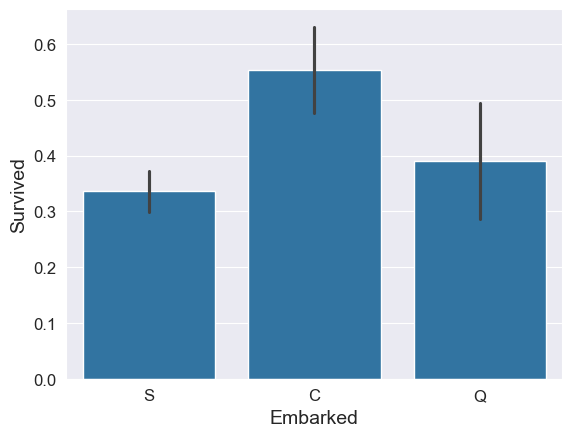

In [472]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.show()

In [473]:
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

In [474]:
age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(age_median)
test['Age'] = test['Age'].fillna(age_median)

In [475]:
embarked_mode = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(embarked_mode)

In [476]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [477]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'S' :0, 'C' :1, 'Q' :2})
test['Embarked'] = test['Embarked'].map({'S' :0, 'C' :1, 'Q' :2})

In [478]:
train = pd.get_dummies(train, columns=['Pclass'], prefix = 'Pclass')
test = pd.get_dummies(test, columns=['Pclass'], prefix = 'Pclass')

In [479]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

In [480]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6}
train['Title'] = train['Title'].map(title_map).fillna(0)
test['Title'] = test['Title'].map(title_map).fillna(0)

In [481]:
train.isnull().sum()

PassengerId    0
Survived       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
FamilySize     0
IsAlone        0
Title          0
dtype: int64

In [482]:
fare_median = train['Fare'].median()
test['Fare'] = test['Fare'].fillna(fare_median)

In [483]:
features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex', 'Age', 'SibSp', 'Parch',
            'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']

X_train = train[features]
y_train = train['Survived']
X_test = test[features]
X_test

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,False,False,True,0,34.5,0,0,7.8292,2,1,1,1.0
1,False,False,True,1,47.0,1,0,7.0000,0,2,0,3.0
2,False,True,False,0,62.0,0,0,9.6875,2,1,1,1.0
3,False,False,True,0,27.0,0,0,8.6625,0,1,1,1.0
4,False,False,True,1,22.0,1,1,12.2875,0,3,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,True,0,28.0,0,0,8.0500,0,1,1,1.0
414,True,False,False,1,39.0,0,0,108.9000,1,1,1,0.0
415,False,False,True,0,38.5,0,0,7.2500,0,1,1,1.0
416,False,False,True,0,28.0,0,0,8.0500,0,1,1,1.0


In [484]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [485]:
features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex', 'Age', 'SibSp', 'Parch',
            'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X = train[features]
Y = train['Survived']

In [486]:
model = LogisticRegression(max_iter=10000, random_state=42)
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(scores)
model.fit(X, Y)
X_test = test[features]
predictions = model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission_baseline.csv', index=False)
print("提交文件已生成：submission_baseline.csv")

[0.81111111 0.79775281 0.75280899 0.84269663 0.82022472 0.78651685
 0.79775281 0.83146067 0.80898876 0.83146067]
提交文件已生成：submission_baseline.csv


In [487]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [488]:
rf = RandomForestClassifier(n_estimators=200,
                            random_state=42,
                            max_depth=6,
                            min_samples_split=5,
                            min_samples_leaf=2,
                            n_jobs=-1)

In [489]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("RF CV 平均准确率：", scores.mean())
print("标准差：", scores.std())

RF CV 平均准确率： 0.8226790534178645
标准差： 0.01679972350344595


In [490]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [491]:
submission_rf = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': rf_pred})
submission_rf.to_csv('submission_rf_v1.csv', index=False)
print("提交文件已生成！")

提交文件已生成！


In [492]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("最佳参数：", grid.best_params_)
print("最佳 CV 分数：", grid.best_score_)

best_rf = grid.best_estimator_
best_pred = best_rf.predict(X_test)

submission_best = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': best_pred})
submission_best.to_csv('submission_rf_tuned.csv', index=False)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
最佳参数： {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}
最佳 CV 分数： 0.8372606867114432


In [493]:
rf_conservative = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_conservative.fit(X_train, y_train)
pred_con = rf_conservative.predict(X_test)
submission_con = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_con})
submission_con.to_csv('submission_rf_conservative.csv', index=False)

In [494]:
bins = [0, 5, 12, 18, 35, 60, 100]
labels = [0, 1, 2, 3, 4, 5]
train['Age_bin'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['Age_bin'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)
train = pd.get_dummies(train, columns=['Age_bin'], prefix='Age')
test = pd.get_dummies(test, columns=['Age_bin'], prefix='Age')


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,FamilySize,IsAlone,Title
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,False,False,True,2,0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,True,False,False,2,0,3.0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,False,False,True,1,1,2.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,True,False,False,2,0,3.0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,False,False,True,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,False,True,False,1,1,6.0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,True,False,False,1,1,2.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0,False,False,True,4,0,2.0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,True,False,False,1,1,1.0


In [495]:
train['Fare_bin'] = pd.qcut(train['Fare'], q=5, labels=[0,1,2,3,4])
test['Fare_bin'] = pd.qcut(test['Fare'], q=5, labels=[0,1,2,3,4])

train = pd.get_dummies(train, columns=['Fare_bin'], prefix='Fare')
test = pd.get_dummies(test, columns=['Fare_bin'], prefix='Fare')

In [496]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme']
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')
train = pd.get_dummies(train, columns=['Title'], prefix='Title')
test = pd.get_dummies(test, columns=['Title'], prefix='Title')

In [497]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

submission_rf_new = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': rf_pred})
submission_rf_new.to_csv('submission_rf_new_features.csv', index=False)
print("新特征 + RF 提交文件已生成！")

新特征 + RF 提交文件已生成！


In [498]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost 5折 CV 平均准确率：", scores_xgb.mean())
print("标准差：", scores_xgb.std())

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

submission_xgb = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': xgb_pred
})
submission_xgb.to_csv('submission_xgb_v1.csv', index=False)
print("XGBoost 提交文件已生成！")

XGBoost 5折 CV 平均准确率： 0.8383968363567886
标准差： 0.018473151063488097
XGBoost 提交文件已生成！


In [499]:
xgb_v2 = XGBClassifier(
    n_estimators=300,          # 多树但慢学习
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=3,
    gamma=0.1,
    reg_lambda=2,
    reg_alpha=0.5,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

xgb_v2.fit(X_train, y_train)
pred_v2 = xgb_v2.predict(X_test)

submission_xgb_v2 = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_v2})
submission_xgb_v2.to_csv('submission_xgb_v2_conservative.csv', index=False)
print("XGBoost v2 提交文件已生成！")

XGBoost v2 提交文件已生成！


In [500]:
features_simple = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
                   'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone']

X_simple = train[features_simple]
X_test_simple = test[features_simple]

xgb_simple = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    random_state=42,
    eval_metric='logloss'
)

xgb_simple.fit(X_simple, y_train)
pred_simple = xgb_simple.predict(X_test_simple)

submission_simple = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_simple})
submission_simple.to_csv('submission_xgb_simple_features.csv', index=False)